# Where should you find a job? North America, Europe or Asia?

## Business Understanding

* As a software engineer, which area has the biggest opportunity and highest salary?
* Does experience matter?
* As a femail developer, will people has sex bias? 
* Does formal education plays a big role in the job market? Which major is the best one in developer's point of view?

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Data Understanding
First, we provide a general view to our data. for example, what kind of developer they are and where are they come from. Also, let's have a quick look on their employment status and how they think about their salary.

In [2]:
df = pd.read_csv('Data/survey_results_public_2020.csv')
df.shape

(64458, 61)

In [3]:
#Provide a pandas series of the counts for each Professional status
df['MainBranch'].value_counts()

I am a developer by profession                                                   47190
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [4]:
#Provide a pandas series of the counts for each Employment status
df['Employment'].value_counts()

Employed full-time                                      45267
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

## Data Preparation
We select our columns of interest and filter the data of the unwanted respondants.

### 1. Select columns

In [5]:

# We select our variables of interest, since they are the ones we want to asses
columns = ['Respondent','Country', 'YearsCodePro', 'UndergradMajor','EdLevel', 'JobSat', 'ConvertedComp','Gender']

# We apply our filters
data = df[df['MainBranch']=='I am a developer by profession']
data = data[data['Employment']=='Employed full-time']

# we filter our columns of interest
data = data[columns]

data.head()

,Respondent,Country,YearsCodePro,UndergradMajor,EdLevel,JobSat,ConvertedComp,Gender
1,2,United Kingdom,4,"Computer science, computer engineering, or sof...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Very dissatisfied,NaN,NaN
5,6,Germany,4,NaN,"Secondary school (e.g. American high school, G...",Slightly satisfied,NaN,Man
6,7,India,4,"Computer science, computer engineering, or sof...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Very satisfied,NaN,NaN
7,8,United States,13,"Computer science, computer engineering, or sof...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Slightly dissatisfied,116000.0,Man
9,10,United Kingdom,4,Mathematics or statistics,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Very satisfied,32315.0,Man


### 2. Add area

In [6]:
Europe = ['Liechtenstein', 'Switzerland','Iceland', 'Norway','Denmark','Ireland', 'United Kingdom', 'Germany',
          'Netherlands', 'Sweden', 'Luxembourg', 'Austria','Finland', 'France', 'Belgium', 'Spain', 'Italy','Poland',
          'Czech Republic','Bulgaria','Ukraine','Hungary','Romania','Greece']

North_America = ['United States', 'Canada']

Asia = ['Thailand', 'Singapore', 'Hong Kong (S.A.R.)', 'Republic of Korea'
           'South Korea', 'Japan', 'China', 
           'Taiwan', 'Malaysia', 'India',
           'Indonesia', 'Vietnam','Russian Federation','Pakistan','New Zealand','Australia','Philippines']
    
#Add a new catagory
data['Area'] = data['Country'].apply(lambda x: 'Europe' if x in Europe 
                                     else ('North_America' if x in North_America 
                                           else ('Asia' if x in Asia else 'other')))


### 3. Transform years of code to int

In [7]:
data.YearsCodePro.unique()

array(['4', '13', '2', '7', '1', '3', '12', '17', '20', '18', '10', '14',
       '29', '6', '28', '8', '23', '15', '9', nan, '25',
       'Less than 1 year', '5', '11', '21', '16', '35', '32', '19', '22',
       '30', '38', '26', '40', '33', '24', '31', '27', '34', '36', '39',
       'More than 50 years', '37', '41', '42', '45', '47', '43', '44',
       '50', '49'], dtype=object)

In [8]:
data = data.reset_index()
data['YearsCodePro'] = data['YearsCodePro'].apply(lambda x: 0 if x == "Less than 1 year" else (50 if x=="More than 50 years" else x))
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'])

data = data[data['YearsCodePro'].notnull()]


In [9]:
convert_ratings = {"JobSat": {"Very satisfied": 5, "Slightly satisfied": 4, 
                              "Neither satisfied nor dissatisfied": 3, 
                              "Slightly dissatisfied": 2, "Very dissatisfied": 1}}
data = data.replace(convert_ratings)


## 4. Transform gender to three type

In [10]:
man = ['Man',
       'Man;Non-binary, genderqueer, or gender non-conforming']

woman = ['Woman',
         'Woman;Non-binary, genderqueer, or gender non-conforming']
         #'Woman;Man;Non-binary, genderqueer, or gender non-conforming']
#Add a new catagory
data['Gender'] = data['Gender'].apply(lambda x: 'Man' if x in man 
                                     else ('Woman' if x in woman 
                                           else 'genderqueer'))



In [11]:
data.head()

,index,Respondent,Country,YearsCodePro,UndergradMajor,EdLevel,JobSat,ConvertedComp,Gender,Area
0,1,2,United Kingdom,4.0,"Computer science, computer engineering, or sof...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1.0,NaN,genderqueer,Europe
1,5,6,Germany,4.0,NaN,"Secondary school (e.g. American high school, G...",4.0,NaN,Man,Europe
2,6,7,India,4.0,"Computer science, computer engineering, or sof...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,NaN,genderqueer,Asia
3,7,8,United States,13.0,"Computer science, computer engineering, or sof...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0,116000.0,Man,North_America
4,9,10,United Kingdom,4.0,Mathematics or statistics,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5.0,32315.0,Man,Europe


### 5. Creat salary data & satisfaction data

In [12]:
salary = data[data['ConvertedComp'].notnull()]
salary.drop('JobSat', axis=1, inplace=True)

satisfaction = data[data['JobSat'].notnull()]
satisfaction.drop('ConvertedComp', axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
salary.shape

(27748, 9)

In [14]:
satisfaction.shape

(35043, 9)

## Visual Analysis

### Question 1: As a software engineer, which area has the biggest opportunity and highest salary?

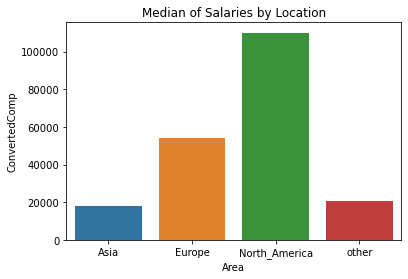

In [15]:
salary_plot = salary.groupby(['Area'])['ConvertedComp'].median().reset_index()

sns.barplot(x = 'Area', y = 'ConvertedComp', data = salary_plot)
plt.title('Median of Salaries by Location');

<AxesSubplot:ylabel='Area'>

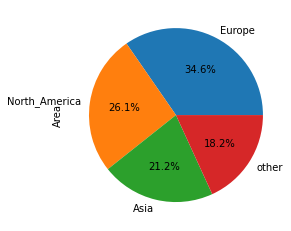

In [16]:
%matplotlib inline
data['Area'].value_counts().plot(kind="pie", autopct="%.1f%%")

## Question 2: Does experience matter?

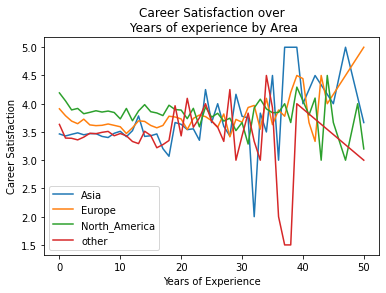

In [17]:
# We group our data by years coded and obtain the mean of the satisfaction
satisfaction_yearcode = satisfaction.groupby(['Area','YearsCodePro'])['JobSat'].mean().reset_index()

sns.lineplot(x="YearsCodePro", y="JobSat", hue="Area", data=satisfaction_yearcode)
plt.ylabel('Career Satisfaction')
plt.xlabel('Years of Experience')
plt.title('Career Satisfaction over\n Years of experience by Area');
plt.legend(loc=3);

<Figure size 1152x720 with 0 Axes>

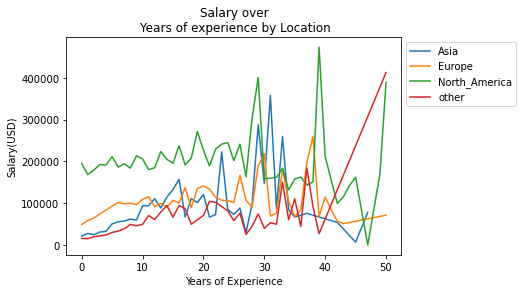

<Figure size 1152x720 with 0 Axes>

In [18]:
# We group our data by years coded and obtain the mean of the satisfaction
salary_yearcode = salary.groupby(['Area','YearsCodePro'])['ConvertedComp'].mean().reset_index()

sns.lineplot(x="YearsCodePro", y="ConvertedComp", hue="Area", data=salary_yearcode)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylabel('Salary(USD)')
plt.xlabel('Years of Experience')
plt.title('Salary over\n Years of experience by Location');
plt.figure(figsize=(16,10))


## Question 3: As a female developer, will people have sex bias? 

(array([0, 1, 2]),
 [Text(0, 0, 'Man'), Text(1, 0, 'Woman'), Text(2, 0, 'genderqueer')])

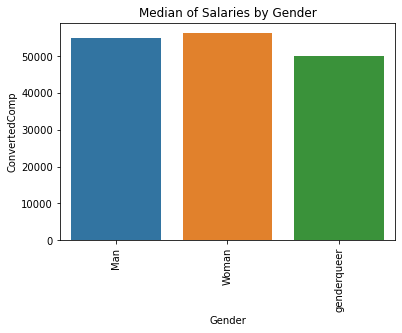

In [19]:
salary_plot = salary.groupby(['Gender'])['ConvertedComp'].median().reset_index()

sns.barplot(x = 'Gender', y = 'ConvertedComp', data = salary_plot)
plt.title('Median of Salaries by Gender');

plt.xticks(rotation=90)



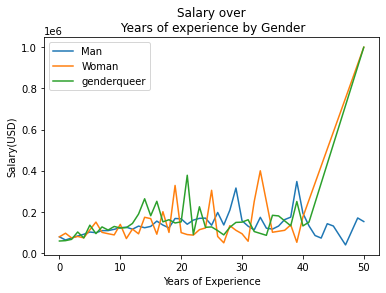

In [20]:
# We group our data by years coded and obtain the mean of the satisfaction
salary_yearcode = salary.groupby(['Gender','YearsCodePro'])['ConvertedComp'].mean().reset_index()

sns.lineplot(x="YearsCodePro", y="ConvertedComp", hue="Gender", data=salary_yearcode)
plt.ylabel('Salary(USD)')
plt.xlabel('Years of Experience')
plt.title('Salary over\n Years of experience by Gender');
plt.legend(loc=2);

## Does formal education play a big role in the job market? Which major is the best one from the developer's point of view?

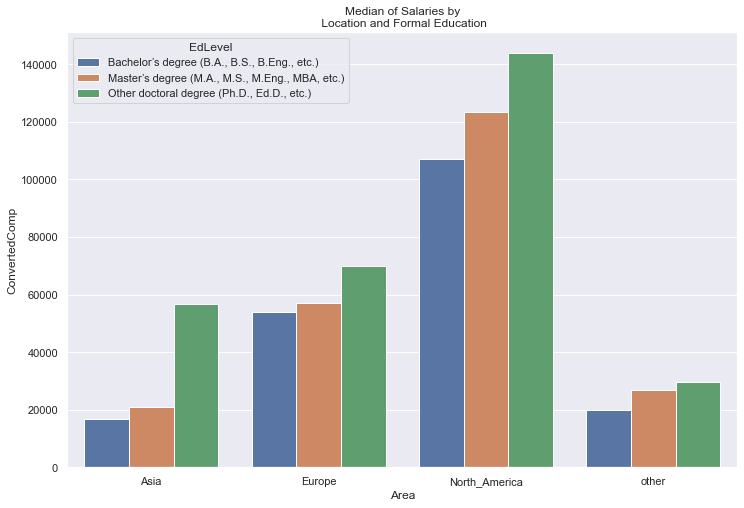

In [21]:
salary_academics = salary.copy()

salary_academics = salary_academics[salary_academics['EdLevel'].isin(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
                                                                      ,'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
                                                                              'Other doctoral degree (Ph.D., Ed.D., etc.)'])]
          

salary_academics_plot = salary_academics.groupby(['Area','EdLevel'])['ConvertedComp'].median().reset_index()
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x = 'Area', y = 'ConvertedComp', hue = 'EdLevel', data = salary_academics_plot)
plt.title('Median of Salaries by\n Location and Formal Education');


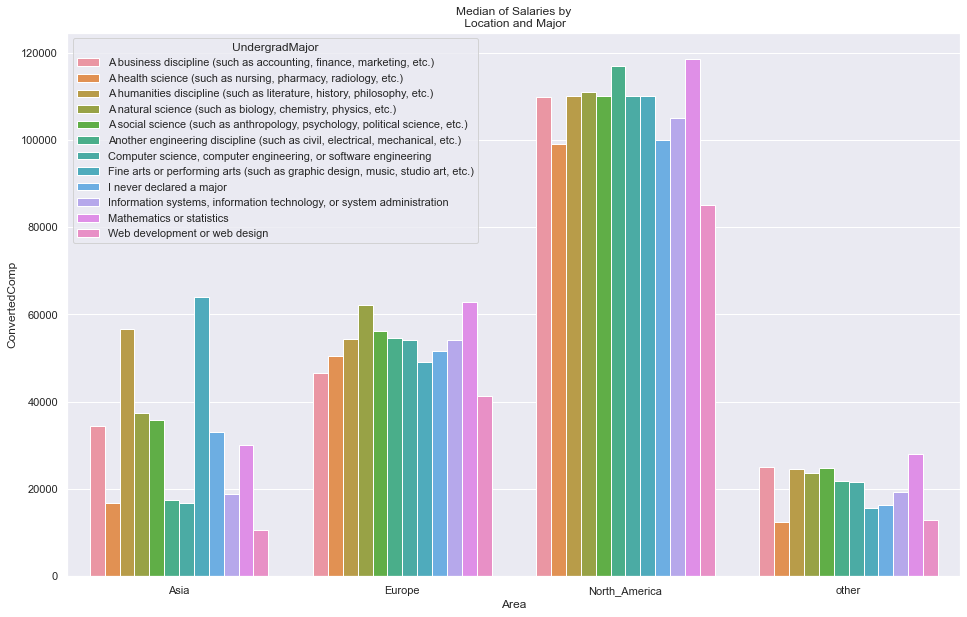

In [22]:
salary_academics = salary.copy()

salary_academics = salary_academics[salary_academics['UndergradMajor'].isin(['Information systems, information technology, or system administration',
'Web development or web design',
'Computer science, computer engineering, or software engineering',
'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
'I never declared a major',	
'A business discipline (such as accounting, finance, marketing, etc.)',
'Mathematics or statistics',
'A humanities discipline (such as literature, history, philosophy, etc.)',
'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
'A social science (such as anthropology, psychology, political science, etc.)',
'A natural science (such as biology, chemistry, physics, etc.)',
'A health science (such as nursing, pharmacy, radiology, etc.)'])]
          

salary_academics_plot = salary_academics.groupby(['Area','UndergradMajor'])['ConvertedComp'].median().reset_index()
sns.set(rc={'figure.figsize':(16,10)})
sns.barplot(x = 'Area', y = 'ConvertedComp', hue = 'UndergradMajor', data = salary_academics_plot)
plt.title('Median of Salaries by\n Location and Major');